<a href="https://colab.research.google.com/github/solbongwol/Bigcontest_22.09/blob/main/%EB%B9%85%EC%BD%98%ED%85%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  #층

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv")

loan_result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7.0,191.0,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25.0,169.0,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2.0,7.0,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4.0,268.0,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11.0,118.0,5000000.0,16.4,NaN


In [ ]:
log_data.head()


,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [ ]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [ ]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41297 entries, 0 to 41296
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         41297 non-null  int64  
 1   loanapply_insert_time  41297 non-null  object 
 2   bank_id                41296 non-null  float64
 3   product_id             41296 non-null  float64
 4   loan_limit             41279 non-null  float64
 5   loan_rate              41279 non-null  float64
 6   is_applied             10834 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32665 entries, 0 to 32664
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         32665 non-null  int64 
 1   event           32665 non-null  object
 2   timestamp       32665 non-null  object
 3   mp_os           32665 non-null  object
 4   mp_app_version  32483 non-null  object
 5   date_cd         32665 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31157 entries, 0 to 31156
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       31157 non-null  int64  
 1   user_id                              31157 non-null  int64  
 2   birth_year                           30865 non-null  float64
 3   gender                               30865 non-null  float64
 4   insert_time                          31157 non-null  object 
 5   credit_score                         28805 non-null  float64
 6   yearly_income                        31152 non-null  float64
 7   income_type                          31152 non-null  object 
 8   company_enter_month                  27544 non-null  float64
 9   employment_type                      31152 non-null  object 
 10  houseown_type                        31152 non-null  object 
 11  desired_amount              

In [ ]:
loan_result.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
count,4.129700e+04,41296.000000,41296.000000,4.127900e+04,41279.000000,10834.000000
mean,1.092028e+06,32.060974,146.473242,2.264440e+07,12.704339,0.061381
std,6.422456e+05,17.537135,79.720322,1.733933e+07,3.768950,0.240039
min,1.753000e+03,1.000000,1.000000,0.000000e+00,3.500000,0.000000
25%,5.125510e+05,19.000000,71.000000,1.000000e+07,9.600000,0.000000
50%,1.093050e+06,33.000000,150.000000,1.800000e+07,13.000000,0.000000
75%,1.662902e+06,46.000000,220.000000,3.200000e+07,15.400000,0.000000
max,2.166886e+06,64.000000,270.000000,2.700000e+08,20.000000,1.000000


In [ ]:
loan_result.shape

(41297, 7)

In [ ]:
log_data.shape

(32665, 6)

In [ ]:
user_spec.shape

(31157, 17)

In [ ]:
user_spec.describe()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,3.115700e+04,31157.000000,30865.000000,30865.000000,28805.000000,3.115200e+04,2.754400e+04,3.115200e+04,18394.000000,4413.000000,26704.000000,2.410800e+04
mean,1.085233e+06,440094.478416,1983.258059,0.679151,638.812706,4.287747e+07,6.448835e+06,3.029921e+07,0.014298,0.006118,4.732624,7.073851e+07
std,6.253749e+05,254241.424026,10.698704,0.466810,121.792866,8.576521e+07,9.263290e+06,1.620716e+08,0.118720,0.077989,4.133655,8.955537e+07
min,7.500000e+01,20.000000,1932.000000,0.000000,100.000000,0.000000e+00,1.979120e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.461040e+05,219791.000000,1976.000000,0.000000,570.000000,2.500000e+07,2.019050e+05,5.000000e+06,0.000000,0.000000,2.000000,2.200000e+07
50%,1.081262e+06,442638.000000,1984.000000,1.000000,620.000000,3.400000e+07,2.021080e+05,1.000000e+07,0.000000,0.000000,4.000000,4.500000e+07
75%,1.627021e+06,658425.000000,1992.000000,1.000000,690.000000,4.800000e+07,2.016110e+07,3.000000e+07,0.000000,0.000000,6.000000,8.300000e+07
max,2.167758e+06,879691.000000,2004.000000,1.000000,1000.000000,5.000000e+09,2.022063e+07,1.000000e+10,1.000000,1.000000,109.000000,2.490000e+09


In [ ]:
user_spec[user_spec["user_id"]==1].head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


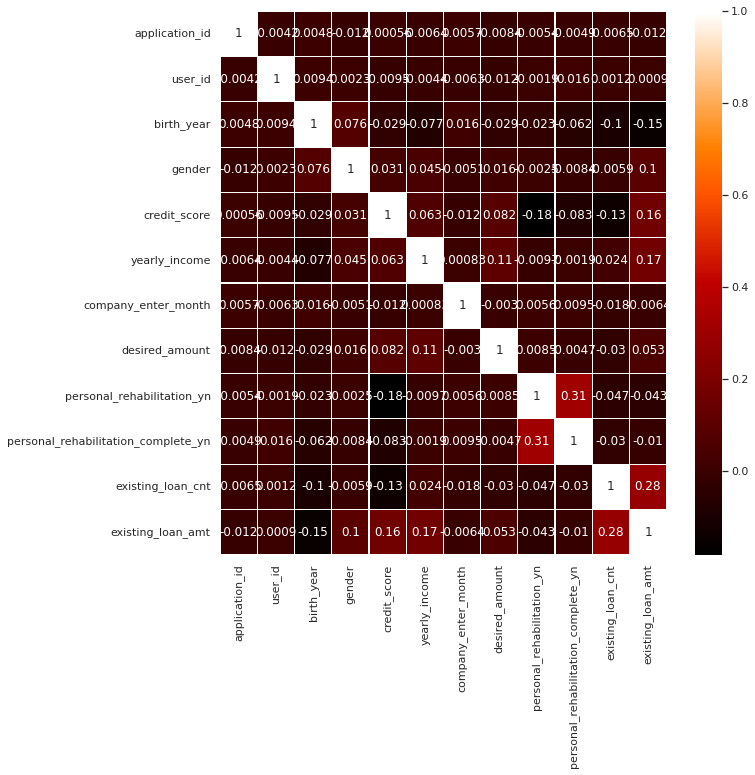

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.figure(figsize=(10,10))
sns.heatmap( user_spec.corr(), linewidths=0.1, linecolor="white", cmap=plt.cm.gist_heat, annot =True)

plt.show()

In [ ]:
d=loan_result.join(log_data)

In [ ]:
d.head(30)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,1748340,2022-06-07 13:05:41,7.0,191.0,42000000.0,13.6,NaN,576409.0,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,1748340,2022-06-07 13:05:41,25.0,169.0,24000000.0,17.9,NaN,576409.0,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,1748340,2022-06-07 13:05:41,2.0,7.0,24000000.0,18.5,NaN,72878.0,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,1748340,2022-06-07 13:05:41,4.0,268.0,29000000.0,10.8,NaN,645317.0,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,1748340,2022-06-07 13:05:41,11.0,118.0,5000000.0,16.4,NaN,645317.0,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
5,1748340,2022-06-07 13:05:40,35.0,168.0,21000000.0,15.2,NaN,640185.0,UseLoanManage,2022-03-25 11:41:53,iOS,3.6.1,2022-03-25
6,1748340,2022-06-07 13:05:40,44.0,8.0,3000000.0,14.8,NaN,640185.0,ViewLoanApplyIntro,2022-03-25 11:42:38,iOS,3.6.1,2022-03-25
7,1748340,2022-06-07 13:05:41,28.0,217.0,10000000.0,18.0,NaN,640185.0,UsePrepayCalc,2022-03-25 11:43:07,iOS,3.6.1,2022-03-25
8,1748340,2022-06-07 13:05:46,47.0,181.0,31000000.0,13.0,NaN,640185.0,UseLoanManage,2022-03-25 11:43:57,iOS,3.6.1,2022-03-25
9,1748340,2022-06-07 13:05:51,11.0,170.0,50000000.0,13.3,NaN,640185.0,UseLoanManage,2022-03-25 11:44:04,iOS,3.6.1,2022-03-25


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41297 entries, 0 to 41296
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         41297 non-null  int64  
 1   loanapply_insert_time  41297 non-null  object 
 2   bank_id                41296 non-null  float64
 3   product_id             41296 non-null  float64
 4   loan_limit             41279 non-null  float64
 5   loan_rate              41279 non-null  float64
 6   is_applied             10834 non-null  float64
 7   user_id                32665 non-null  float64
 8   event                  32665 non-null  object 
 9   timestamp              32665 non-null  object 
 10  mp_os                  32665 non-null  object 
 11  mp_app_version         32483 non-null  object 
 12  date_cd                32665 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 4.1+ MB


In [ ]:
df1=d.join(user_spec, rsuffix="user_id")
df1.shape

(41297, 30)

In [ ]:
df2=d.join(user_spec)
df2.shape

ValueError: ignored

In [ ]:
df1.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,application_iduser_id,user_iduser_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,4.129700e+04,41296.000000,41296.000000,4.127900e+04,41279.000000,10834.000000,32665.000000,3.115700e+04,31157.000000,30865.000000,30865.000000,28805.000000,3.115200e+04,2.754400e+04,3.115200e+04,18394.000000,4413.000000,26704.000000,2.410800e+04
mean,1.092028e+06,32.060974,146.473242,2.264440e+07,12.704339,0.061381,444599.990326,1.085233e+06,440094.478416,1983.258059,0.679151,638.812706,4.287747e+07,6.448835e+06,3.029921e+07,0.014298,0.006118,4.732624,7.073851e+07
std,6.422456e+05,17.537135,79.720322,1.733933e+07,3.768950,0.240039,255155.913075,6.253749e+05,254241.424026,10.698704,0.466810,121.792866,8.576521e+07,9.263290e+06,1.620716e+08,0.118720,0.077989,4.133655,8.955537e+07
min,1.753000e+03,1.000000,1.000000,0.000000e+00,3.500000,0.000000,12.000000,7.500000e+01,20.000000,1932.000000,0.000000,100.000000,0.000000e+00,1.979120e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.125510e+05,19.000000,71.000000,1.000000e+07,9.600000,0.000000,225747.000000,5.461040e+05,219791.000000,1976.000000,0.000000,570.000000,2.500000e+07,2.019050e+05,5.000000e+06,0.000000,0.000000,2.000000,2.200000e+07
50%,1.093050e+06,33.000000,150.000000,1.800000e+07,13.000000,0.000000,454854.000000,1.081262e+06,442638.000000,1984.000000,1.000000,620.000000,3.400000e+07,2.021080e+05,1.000000e+07,0.000000,0.000000,4.000000,4.500000e+07
75%,1.662902e+06,46.000000,220.000000,3.200000e+07,15.400000,0.000000,666613.000000,1.627021e+06,658425.000000,1992.000000,1.000000,690.000000,4.800000e+07,2.016110e+07,3.000000e+07,0.000000,0.000000,6.000000,8.300000e+07
max,2.166886e+06,64.000000,270.000000,2.700000e+08,20.000000,1.000000,879629.000000,2.167758e+06,879691.000000,2004.000000,1.000000,1000.000000,5.000000e+09,2.022063e+07,1.000000e+10,1.000000,1.000000,109.000000,2.490000e+09


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41297 entries, 0 to 41296
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       41297 non-null  int64  
 1   loanapply_insert_time                41297 non-null  object 
 2   bank_id                              41296 non-null  float64
 3   product_id                           41296 non-null  float64
 4   loan_limit                           41279 non-null  float64
 5   loan_rate                            41279 non-null  float64
 6   is_applied                           10834 non-null  float64
 7   user_id                              32665 non-null  float64
 8   event                                32665 non-null  object 
 9   timestamp                            32665 non-null  object 
 10  mp_os                                32665 non-null  object 
 11  mp_app_version              

In [ ]:
df2.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,application_idapplication_id,user_idapplication_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,4.129700e+04,41296.000000,41296.000000,4.127900e+04,41279.000000,10834.000000,32665.000000,3.115700e+04,31157.000000,30865.000000,30865.000000,28805.000000,3.115200e+04,2.754400e+04,3.115200e+04,18394.000000,4413.000000,26704.000000,2.410800e+04
mean,1.092028e+06,32.060974,146.473242,2.264440e+07,12.704339,0.061381,444599.990326,1.085233e+06,440094.478416,1983.258059,0.679151,638.812706,4.287747e+07,6.448835e+06,3.029921e+07,0.014298,0.006118,4.732624,7.073851e+07
std,6.422456e+05,17.537135,79.720322,1.733933e+07,3.768950,0.240039,255155.913075,6.253749e+05,254241.424026,10.698704,0.466810,121.792866,8.576521e+07,9.263290e+06,1.620716e+08,0.118720,0.077989,4.133655,8.955537e+07
min,1.753000e+03,1.000000,1.000000,0.000000e+00,3.500000,0.000000,12.000000,7.500000e+01,20.000000,1932.000000,0.000000,100.000000,0.000000e+00,1.979120e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.125510e+05,19.000000,71.000000,1.000000e+07,9.600000,0.000000,225747.000000,5.461040e+05,219791.000000,1976.000000,0.000000,570.000000,2.500000e+07,2.019050e+05,5.000000e+06,0.000000,0.000000,2.000000,2.200000e+07
50%,1.093050e+06,33.000000,150.000000,1.800000e+07,13.000000,0.000000,454854.000000,1.081262e+06,442638.000000,1984.000000,1.000000,620.000000,3.400000e+07,2.021080e+05,1.000000e+07,0.000000,0.000000,4.000000,4.500000e+07
75%,1.662902e+06,46.000000,220.000000,3.200000e+07,15.400000,0.000000,666613.000000,1.627021e+06,658425.000000,1992.000000,1.000000,690.000000,4.800000e+07,2.016110e+07,3.000000e+07,0.000000,0.000000,6.000000,8.300000e+07
max,2.166886e+06,64.000000,270.000000,2.700000e+08,20.000000,1.000000,879629.000000,2.167758e+06,879691.000000,2004.000000,1.000000,1000.000000,5.000000e+09,2.022063e+07,1.000000e+10,1.000000,1.000000,109.000000,2.490000e+09


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41297 entries, 0 to 41296
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       41297 non-null  int64  
 1   loanapply_insert_time                41297 non-null  object 
 2   bank_id                              41296 non-null  float64
 3   product_id                           41296 non-null  float64
 4   loan_limit                           41279 non-null  float64
 5   loan_rate                            41279 non-null  float64
 6   is_applied                           10834 non-null  float64
 7   user_id                              32665 non-null  float64
 8   event                                32665 non-null  object 
 9   timestamp                            32665 non-null  object 
 10  mp_os                                32665 non-null  object 
 11  mp_app_version              

In [ ]:
df=df1

In [ ]:
df.isnull().sum()

application_id                             0
loanapply_insert_time                      0
bank_id                                    1
product_id                                 1
loan_limit                                18
loan_rate                                 18
is_applied                             30463
user_id                                 8632
event                                   8632
timestamp                               8632
mp_os                                   8632
mp_app_version                          8814
date_cd                                 8632
application_iduser_id                  10140
user_iduser_id                         10140
birth_year                             10432
gender                                 10432
insert_time                            10140
credit_score                           12492
yearly_income                          10145
income_type                            10145
company_enter_month                    13753
employment

In [ ]:
df[df["is_applied"]=="NaN"].head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,event,timestamp,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


In [ ]:
test=loan_result[loan_result["is_applied"].isnull()]
test.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7.0,191.0,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25.0,169.0,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2.0,7.0,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4.0,268.0,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11.0,118.0,5000000.0,16.4,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30463 entries, 0 to 41296
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         30463 non-null  int64  
 1   loanapply_insert_time  30463 non-null  object 
 2   bank_id                30462 non-null  float64
 3   product_id             30462 non-null  float64
 4   loan_limit             30451 non-null  float64
 5   loan_rate              30451 non-null  float64
 6   is_applied             0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.9+ MB


In [114]:
loan=loan_result.dropna(axis=0)
log_data.user_id[:].values[2]


72878

In [120]:
a=[]
ar=log_data.user_id[:].values.reshape
print(ar.shape)
for i in log_data.user_id[:].values :
   count=0
   if ar[j]==i:
     count+=1
     a.append(count)
   j+=1  

AttributeError: ignored

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 13284 to 32307
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         10828 non-null  int64  
 1   loanapply_insert_time  10828 non-null  object 
 2   bank_id                10828 non-null  float64
 3   product_id             10828 non-null  float64
 4   loan_limit             10828 non-null  float64
 5   loan_rate              10828 non-null  float64
 6   is_applied             10828 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 676.8+ KB


In [ ]:
loan.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
count,1.082800e+04,10828.000000,10828.000000,1.082800e+04,10828.000000,10828.000000
mean,1.097485e+06,32.637976,148.695050,2.217021e+07,12.548190,0.060861
std,6.531643e+05,17.437897,76.472973,1.764539e+07,3.882952,0.239086
min,1.753000e+03,1.000000,8.000000,0.000000e+00,3.700000,0.000000
25%,4.783470e+05,19.000000,75.000000,9.000000e+06,9.400000,0.000000
50%,1.111630e+06,33.000000,150.000000,1.700000e+07,12.900000,0.000000
75%,1.696715e+06,47.000000,217.000000,3.300000e+07,15.600000,0.000000
max,2.165894e+06,64.000000,270.000000,2.670000e+08,20.000000,1.000000


In [ ]:
log_data.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [124]:
log_count=log_data.groupby(["user_id"])["user_id"].count()
print(log_count)
#32665
#겹침있음

user_id
12         8
91         4
95         4
198       11
279        2
          ..
879168     6
879287     4
879450     3
879451    18
879629     3
Name: user_id, Length: 5881, dtype: int64


In [130]:
test_count=test.groupby(["application_id"])["application_id"].count()
print(test_count)
#30463
#겹침 있음

application_id
3635       21
4653       12
4927       31
5539       25
8489       21
           ..
2165870     2
2166165     4
2166198     4
2166599     1
2166886    61
Name: application_id, Length: 2142, dtype: int64


In [131]:
user_count_user=user_spec.groupby(["user_id"])["user_id"].count()
print(user_count_user)
#31157
#겹침 있음

user_id
20        1
31        1
51        1
132       1
244       1
         ..
879526    1
879527    1
879603    1
879650    1
879691    1
Name: user_id, Length: 25129, dtype: int64


In [132]:
user_count_app=user_spec.groupby(["application_id"])["application_id"].count()
print(user_count_app)
#31157
#겹침 없음

application_id
75         1
76         1
83         1
141        1
168        1
          ..
2167589    1
2167612    1
2167648    1
2167742    1
2167758    1
Name: application_id, Length: 31157, dtype: int64
